# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from pprint import pprint
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
cities[0:4]

['tasiilaq', 'vaini', 'rafaela', 'alice springs']

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [5]:
city = "rikitea"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
print(weather_response.status_code)
weather_json = weather_response.json()

200


In [6]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -23.1203, 'lon': -134.9692},
 'dt': 1647457665,
 'id': 4030556,
 'main': {'feels_like': 26.55,
          'grnd_level': 1009,
          'humidity': 81,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 26.55,
          'temp_max': 26.55,
          'temp_min': 26.55},
 'name': 'Rikitea',
 'rain': {'1h': 0.4},
 'sys': {'country': 'PF', 'sunrise': 1647442927, 'sunset': 1647486892},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 310, 'gust': 11.97, 'speed': 10.65}}


In [7]:
type(weather_json)

dict

In [8]:
lats = []
lngs = []
countries = []
clouds = []
names =[]
winds = []
temps = []
pressures = []
humids = []
dates = []

for city in cities:
    
    
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    
    
    try:
    
    
    # get data
        weather_json = weather_response.json()

        lat = weather_json["coord"]["lat"]
        lon = weather_json["coord"]["lon"]
        country = weather_json["sys"]["country"]
        cloud = weather_json["clouds"]['all']
        name = weather_json["name"]
        wind = weather_json['wind']['speed']
        temp = weather_json["main"]["temp"]
        pressure = weather_json["main"]["pressure"]
        humidity = weather_json["main"]['humidity']
        dt = weather_json["dt"]
    
        lats.append(lat)
        lngs.append(lon)
        countries.append(country)
        clouds.append(cloud)
        dates.append(dt)
        names.append(name)
        winds.append(wind)
        temps.append(temp)
        pressures.append(pressure)
        humids.append(humidity)

# (Needed reference for the exception) https://smu.bootcampcontent.com/SMU-Coding-Bootcamp/SMU-DAL-VIRT-DATA-PT-12-2021-U-C/-/blob/main/02-Homework/06-Python-APIs/Instructions/starter_code/WeatherPy-Booth.ipynb
    except Exception as e:
        
        
        lats.append(np.nan)
        lngs.append(np.nan)
        countries.append(np.nan)
        clouds.append(np.nan)
        dates.append(np.nan)
        names.append(city)
        winds.append(np.nan)
        temps.append(np.nan)
        pressures.append(np.nan)
        humids.append(np.nan)
          
    time.sleep(1)
        
        
df = pd.DataFrame()
df["city"] = names
df["latitude"] = lats
df["longitude"] = lngs
df['Country'] = countries
df['Temperature'] = temps
df['Humidity'] = humids
df["Cloud Level"] = clouds
df["Wind Speed"] = winds
df["Air Pressure"] = pressures
df["Date"] = dates
df.head()

,city,latitude,longitude,Country,Temperature,Humidity,Cloud Level,Wind Speed,Air Pressure,Date
0,Tasiilaq,65.6145,-37.6368,GL,-4.91,92.0,100.0,3.41,975.0,1.647458e+09
1,Vaini,-21.2000,-175.2000,TO,24.09,100.0,100.0,1.54,1013.0,1.647458e+09
2,Rafaela,-31.2503,-61.4867,AR,29.99,31.0,0.0,2.24,1009.0,1.647458e+09
3,Alice Springs,-23.7000,133.8833,AU,26.75,32.0,41.0,2.57,1011.0,1.647458e+09
4,Sidi Ali,36.0998,0.4206,DZ,11.14,81.0,100.0,2.87,1011.0,1.647458e+09


In [9]:
df.to_csv("my_weather.csv", index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
output_data_file2 = "../code/my_weather.csv"

In [13]:
df6 = pd.read_csv(output_data_file2)
df6.head()

,city,latitude,longitude,Country,Temperature,Humidity,Cloud Level,Wind Speed,Air Pressure,Date
0,Tasiilaq,65.6145,-37.6368,GL,-4.91,92.0,100.0,3.41,975.0,1.647458e+09
1,Vaini,-21.2000,-175.2000,TO,24.09,100.0,100.0,1.54,1013.0,1.647458e+09
2,Rafaela,-31.2503,-61.4867,AR,29.99,31.0,0.0,2.24,1009.0,1.647458e+09
3,Alice Springs,-23.7000,133.8833,AU,26.75,32.0,41.0,2.57,1011.0,1.647458e+09
4,Sidi Ali,36.0998,0.4206,DZ,11.14,81.0,100.0,2.87,1011.0,1.647458e+09


In [14]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          630 non-null    object 
 1   latitude      570 non-null    float64
 2   longitude     570 non-null    float64
 3   Country       565 non-null    object 
 4   Temperature   570 non-null    float64
 5   Humidity      570 non-null    float64
 6   Cloud Level   570 non-null    float64
 7   Wind Speed    570 non-null    float64
 8   Air Pressure  570 non-null    float64
 9   Date          570 non-null    float64
dtypes: float64(8), object(2)
memory usage: 49.3+ KB


In [15]:
mask = df6.latitude >= -90
clean_df = df6.loc[mask]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 629
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          570 non-null    object 
 1   latitude      570 non-null    float64
 2   longitude     570 non-null    float64
 3   Country       565 non-null    object 
 4   Temperature   570 non-null    float64
 5   Humidity      570 non-null    float64
 6   Cloud Level   570 non-null    float64
 7   Wind Speed    570 non-null    float64
 8   Air Pressure  570 non-null    float64
 9   Date          570 non-null    float64
dtypes: float64(8), object(2)
memory usage: 49.0+ KB


In [16]:
clean_df.describe()

,latitude,longitude,Temperature,Humidity,Cloud Level,Wind Speed,Air Pressure,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,18.699642,21.969442,13.387825,71.863158,57.380702,3.620000,1014.750877,1.647458e+09
std,33.316815,89.683980,15.953389,23.408323,41.401128,2.587919,9.830249,3.378646e+02
min,-54.800000,-179.166700,-33.180000,1.000000,0.000000,0.000000,975.000000,1.647457e+09
25%,-7.707050,-54.264150,5.317500,62.000000,11.000000,1.675000,1009.000000,1.647458e+09
50%,20.925350,25.697350,18.770000,78.000000,74.500000,2.980000,1013.000000,1.647458e+09
75%,46.583850,100.917150,25.752500,90.000000,100.000000,4.860000,1021.000000,1.647458e+09
max,78.218600,179.316700,33.860000,100.000000,100.000000,18.010000,1042.000000,1.647459e+09


In [17]:
clean_df.to_csv("my_clean_weather.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

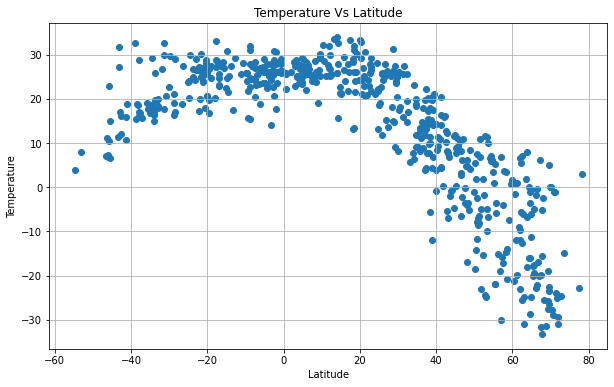

In [18]:
plt.figure(figsize=(10,6))
x_axis = clean_df.latitude
y_axis = clean_df.Temperature 
plt.scatter(x_axis, y_axis)

plt.title("Temperature Vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.grid()
plt.savefig("Fig1.png", bbox_inches='tight')
plt.show()


In [ ]:
# This scatter plot displays the cities in the southern hemisphere being warmer than the cities
# in the northern hemisphere between 20 and 60 degrees away from the equator as it is currently
# the summer season in the southern hemisphere. Also, the cities near the equator are warmer than
# those well north of it.

## Latitude vs. Humidity Plot

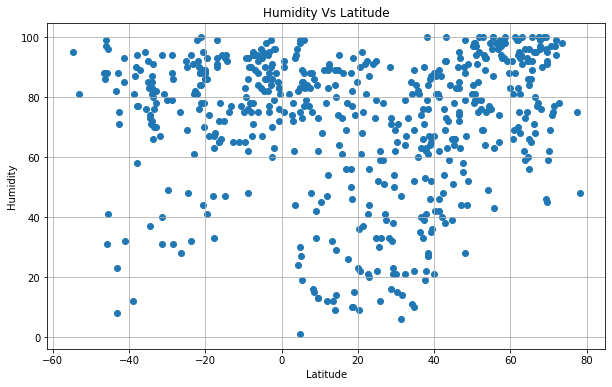

In [22]:
plt.figure(figsize=(10,6))
x_axis2 = clean_df.latitude
y_axis2 = clean_df.Humidity
plt.scatter(x_axis2, y_axis2)

plt.title("Humidity Vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid()
plt.savefig("Fig2.png", bbox_inches = 'tight')
plt.show()



In [ ]:
# There does not seem to be a correlation betweeb humidity and latitude. The lower humidity measures
# do tend to be in the cities just north of the equator, in the ~5 to 40 degree range.

## Latitude vs. Cloudiness Plot

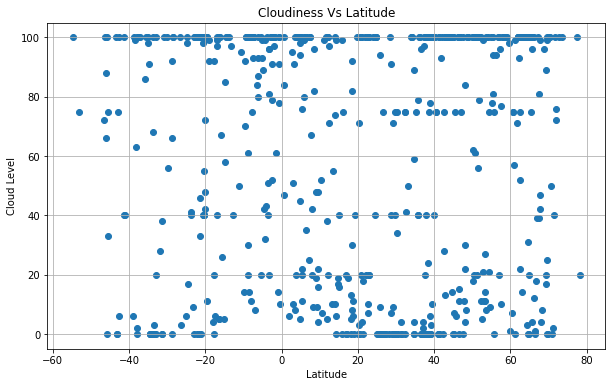

In [23]:
plt.figure(figsize=(10,6))
x_axis3 = clean_df.latitude
y_axis3 = clean_df["Cloud Level"] 
plt.scatter(x_axis3, y_axis3)

plt.title("Cloudiness Vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloud Level")

plt.grid()
plt.savefig("Fig3.png", bbox_inches = 'tight')
plt.show()



In [ ]:
# The cloudiness vs latitude scatter plot doesn't tell us much useful information. The only noticeable observation
# I see is the ratio of a 100 cloudiness level compared to 0 cloudiness seems to be larger with the southern
# hemipshere cities, having considerably more cloudy cities than clear cities. 


## Latitude vs. Wind Speed Plot

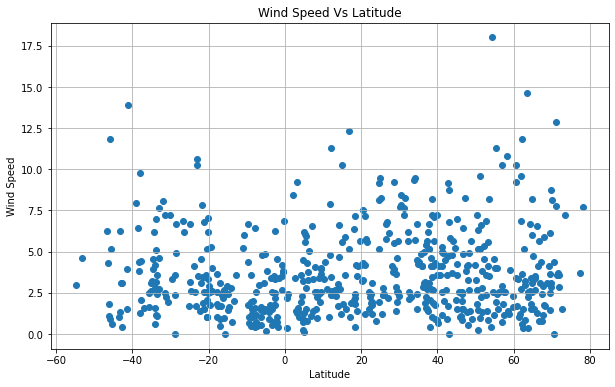

In [24]:
plt.figure(figsize=(10,6))
x_axis4 = clean_df.latitude
y_axis4 = clean_df['Wind Speed'] 
plt.scatter(x_axis4, y_axis4)

plt.title("Wind Speed Vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.grid()
plt.savefig("Fig4.png", bbox_inches = 'tight')
plt.show()



In [ ]:
# The wind speed holds mostly constant across latitudes, with a few exceptions and outliers in the cities well north 
# of the equator. Being in the winter season, higher wind speeds is not all that surprising in the much colder regions.

## Linear Regression

In [ ]:
mask3 = clean_df.latitude > 0 
north_df = clean_df.loc[mask3]
north_df.info()

In [ ]:
x_axis5 = north_df.latitude
y_axis5 = north_df.Temperature 
plt.scatter(x_axis5, y_axis5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis5, y_axis5)
regress_values = x_axis5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis5,regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Temperature vs Northern Hemisphere Cities")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("regression_north_temp.png")
plt.show()

In [ ]:
# This linear regression displays the temperatures of northern cities decreasing (getting colder) as their distance
# from the equator is greater. Being further away from the equator in the winter season means receiving less direct 
# sunlight, explaining the dcreasing temperatures.

In [ ]:
import statsmodels.api as sm

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
mask4 = clean_df.latitude < 0
south_df = clean_df.loc[mask4]
south_df.info()

In [ ]:
x_axis6 = south_df.latitude
y_axis6 = south_df.Temperature 
plt.scatter(x_axis6, y_axis6)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis6, y_axis6)
regress_values = x_axis6 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis6,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Temperature vs Southern Hemisphere Cities")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("regression_south_temp.png")
plt.show()

In [ ]:
# As cities are nearer to the equator, the temperature is greater than those well south of the equator with a trio
# of outliers approximately around the 30 degree south region.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_axis7 = north_df.latitude
y_axis7 = north_df.Humidity 
plt.scatter(x_axis7, y_axis7)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis7, y_axis7)
regress_values = x_axis7 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis7,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs Northern Hemisphere Cities")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("regression_north_humidity.png")
plt.show()

In [ ]:
# Humidity in northern hemisphere cities produces many in the significant humidity category. The further north the
# city lies produces more consistency in the higher levels of humidity. A good proportion closer to the equator have 
# smaller humidity levels.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_axis8 = south_df.latitude
y_axis8 = south_df.Humidity 
plt.scatter(x_axis8, y_axis8)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis8, y_axis8)
regress_values = x_axis8 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis8,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs Southern Hemisphere Cities")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("regression_south_humditiy.png")
plt.show()

In [ ]:
# Humidity in the southern hemisphere stays consistent throughout the latitudes, with a trio of noticeable outliers
# between latitudes of -30 to -20.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_axis9 = north_df.latitude
y_axis9 = north_df['Cloud Level'] 
plt.scatter(x_axis9, y_axis9)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis9, y_axis9)
regress_values = x_axis9 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis9,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloud Level')
plt.title("Cloudiness vs Northern Hemisphere Cities")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("regression_north_cloud.png")
plt.show()

In [ ]:
# Cloud level in the nothern hemisphere is affected by those cities further north as there are many with a cloudiness
# level at or near 100. This can be explained by those cities in region experiencing constant snowfall.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_axis10 = south_df.latitude
y_axis10 = south_df["Cloud Level"] 
plt.scatter(x_axis10, y_axis10)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis10, y_axis10)
regress_values = x_axis10 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis10,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloud Level')
plt.title('Cloudiness vs Southern Hemisphere Cities')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("regression_south_cloud.png")
plt.show()

In [ ]:
# Oddly enough, the greater cloud levels currently trend towards cities near the equator. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_axis11 = north_df.latitude
y_axis11 = north_df["Wind Speed"] 
plt.scatter(x_axis11, y_axis11)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis11, y_axis11)
regress_values = x_axis11 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis11,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Wind Speed vs Northern Hemisphere Cities")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("regression_north_wind.png")
plt.show()

In [ ]:
# With the exception of outliers futher north, there is no relationship of wind speed and latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_axis12 = south_df.latitude
y_axis12 = south_df["Wind Speed"] 
plt.scatter(x_axis12, y_axis12)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis12, y_axis12)
regress_values = x_axis12 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis12,regress_values,"r-")
plt.annotate(line_eq,(-30,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Wind Speed vs Southern Hemisphere Cities")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("regression_south_wind.png")
plt.show()


In [ ]:
# Wind speed also doesn't alter due to position south of the equator. Outliers are present, with those cities with 
# wind speeds at or above 10.